In [89]:
import pandas as pd
import matplotlib.pyplot as plt


In [90]:
data_folder = "../../../data/"

In [91]:
danmu_data = pd.read_csv("../../../data/activeuser_submit_danmu_sound_with_drama_202211_202303.csv")

In [92]:
danmu_data['date'] = pd.to_datetime(danmu_data['danmu_info_date']).dt.date

In [116]:
danmu_data = danmu_data[danmu_data["user_in_drama_sound_pay_type"] == 2]

In [119]:
print({danmu_data.shape}, {danmu_data["drama_id"].nunique()})

{(1247307, 11)} {499}


In [95]:
DL_dataset = pd.read_csv("../../../data/0101_0131_all_feature.csv")

In [96]:
DL_dataset.head()

,user_id,sound_id_id,drama_id,user_name_len,user_name_has_chinese,user_name_has_english,user_intro_len,user_intro_has_chinese,user_intro_has_english,user_icon_is_default,...,k_3_15s_sim,k_2_8s_sim_q_1_num,k_2_8s_sim_q_2_num,k_2_8s_sim_q_3_num,k_2_15s_sim_q_1_num,k_2_15s_sim_q_2_num,k_2_15s_sim_q_3_num,user_in_drama_is_pay_for_drama_in_next_time,pay_FS,pay_DL
0,12304,7017722,52265,18,0,0,NaN,0,0,0,...,0.913019,0.283098,0.468008,0.652918,0.279280,0.461234,0.461234,2,2,2
1,24488,6976696,59699,25,0,0,60.0,1,0,0,...,0.835461,0.252245,0.417907,0.583569,0.254123,0.420560,0.420560,2,2,2
2,24488,6991707,59328,25,0,0,60.0,1,0,0,...,0.826704,0.248742,0.412480,0.576218,0.252045,0.416657,0.416657,2,2,2
3,24488,7018734,59699,25,0,0,60.0,1,0,0,...,0.743361,0.171188,0.284708,0.398228,0.208059,0.345994,0.345994,2,2,2
4,24488,7059430,60282,25,0,0,60.0,1,0,0,...,0.878291,0.258000,0.429238,0.600477,0.261848,0.435509,0.435509,2,2,2


In [97]:
drama_uniq = DL_dataset["drama_id"].nunique()
user_uniq = DL_dataset["user_id"].nunique()
sound_uniq = DL_dataset["sound_id_id"].nunique()


In [98]:
print(f"drama_uniq: {drama_uniq}, user_uniq: {user_uniq}, sound_uniq :{sound_uniq}")

drama_uniq: 345, user_uniq: 8736, sound_uniq :1925


In [99]:
drama_list  = DL_dataset["drama_id"].unique().tolist()

In [100]:
len(drama_list)

345

In [101]:
drama_list[0]

52265

In [134]:
danmu_data_0101_drama_id =danmu_data[danmu_data ['drama_id'].isin(drama_list)]
danmu_data_0101_drama_id_in_2023 = danmu_data_0101_drama_id[pd.to_datetime(danmu_data_0101_drama_id['date']) >= '2023-02-01']


In [135]:
danmu_data_0101_drama_id_in_2023.shape

(413921, 11)

In [136]:
danmu_data_0101_drama_id_in_2023["user_in_drama_sound_pay_type"].describe()

count    413921.0
mean          2.0
std           0.0
min           2.0
25%           2.0
50%           2.0
75%           2.0
max           2.0
Name: user_in_drama_sound_pay_type, dtype: float64

In [137]:
grouped_df = danmu_data_0101_drama_id_in_2023.groupby('drama_id')['date'].agg(['max', 'min'])


In [138]:
grouped_df.to_csv("pay_first_day_data.csv")

In [139]:
grouped_df

,max,min
drama_id,,
9059,2023-11-02,2023-02-03
9888,2023-12-02,2023-02-01
13774,2023-10-01,2023-02-25
14103,2023-03-02,2023-03-02
15273,2023-08-01,2023-05-03
...,...,...
59564,2023-12-03,2023-02-02
59699,2023-12-03,2023-02-02
60013,2023-12-03,2023-02-03


In [140]:
grouped_df["min"].describe()

count            337
unique            27
top       2023-02-01
freq             221
Name: min, dtype: object

In [141]:
min_pay = grouped_df["min"].value_counts()

In [142]:
min_pay

2023-02-01    221
2023-02-02     43
2023-02-03     19
2023-02-13     14
2023-02-16      7
2023-02-19      3
2023-02-15      3
2023-02-17      2
2023-02-20      2
2023-02-21      2
2023-02-22      2
2023-02-14      2
2023-02-18      2
2023-02-25      2
2023-08-01      1
2023-02-23      1
2023-03-01      1
2023-06-01      1
2023-05-01      1
2023-09-02      1
2023-02-24      1
2023-03-03      1
2023-08-03      1
2023-09-01      1
2023-05-03      1
2023-03-02      1
2023-02-26      1
Name: min, dtype: int64

Text(0.5, 1.0, 'Value Counts')

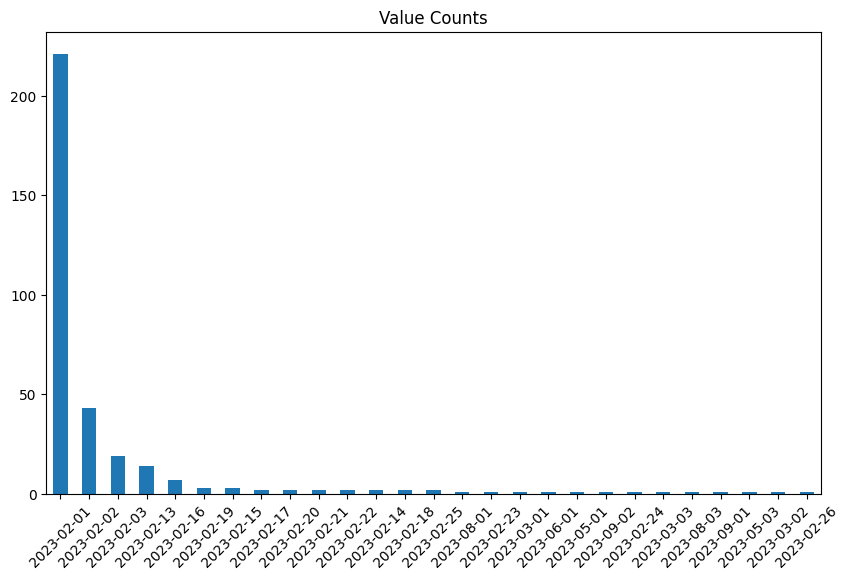

In [143]:
# 使用plot()方法绘制条形图，并设置图片大小
min_pay.plot(kind='bar', figsize=(10, 6))

# 调整横坐标长度
plt.xticks(rotation=45)

# 添加图表标题和轴标签
plt.title('Value Counts')